# Dataset A

## Import required libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load dataset

Load flight dataset

In [52]:
df = pd.read_csv('/Users/markmans/code/diego-mogollon/lateguru/raw_data/Dataset_A_US2023_Kaggle_US_Flights_2023.csv')

In [53]:
df.head()

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,...,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Manufacturer,Model,Aicraft_age
0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,...,56,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,62,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,49,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,...,54,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,17
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,...,50,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10


Load weather dataset

In [54]:
df2 = pd.read_csv('/Users/markmans/code/diego-mogollon/lateguru/raw_data/Dataset_A_US2023_Kaggle_Weather_Meteo_By_Airport.csv')

In [55]:
df2.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,airport_id
0,2023-01-01,8.1,2.2,11.7,0.0,0.0,278.0,9.7,1013.8,ABE
1,2023-01-02,5.4,0.0,11.7,0.0,0.0,353.0,3.6,1019.6,ABE
2,2023-01-03,8.4,7.2,9.4,15.2,0.0,50.0,5.0,1013.9,ABE
3,2023-01-04,11.1,6.7,17.2,0.0,0.0,302.0,4.7,1009.8,ABE
4,2023-01-05,12.7,6.7,14.4,7.9,0.0,292.0,7.2,1013.0,ABE


Rename joining columns

In [56]:
df2.rename(columns={'time': 'FlightDate', 'airport_id': 'Dep_Airport'}, inplace=True)

In [57]:
df2.head()

,FlightDate,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,Dep_Airport
0,2023-01-01,8.1,2.2,11.7,0.0,0.0,278.0,9.7,1013.8,ABE
1,2023-01-02,5.4,0.0,11.7,0.0,0.0,353.0,3.6,1019.6,ABE
2,2023-01-03,8.4,7.2,9.4,15.2,0.0,50.0,5.0,1013.9,ABE
3,2023-01-04,11.1,6.7,17.2,0.0,0.0,302.0,4.7,1009.8,ABE
4,2023-01-05,12.7,6.7,14.4,7.9,0.0,292.0,7.2,1013.0,ABE


Merge the datasets. Join by FlightDate and Aiport_ID

In [58]:
mdf = pd.merge(df, df2, on=['FlightDate', 'Dep_Airport'])

In [59]:
mdf.head()

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,...,Model,Aicraft_age,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,...,CRJ,16,2.9,-2.1,8.3,0.0,0.0,338.0,3.2,1019.1
1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,CRJ,16,1.8,-1.6,4.4,10.7,0.0,3.0,3.6,1015.2
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,CRJ,10,5.2,3.9,8.3,6.6,0.0,1.0,7.2,1011.1
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,...,CRJ,17,6.8,3.9,7.8,0.8,0.0,14.0,13.7,1014.8
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,...,CRJ,10,3.3,0.0,3.9,9.7,0.0,0.0,5.8,1016.1


## Basic observations

In [60]:
mdf.head()

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,...,Model,Aicraft_age,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,...,CRJ,16,2.9,-2.1,8.3,0.0,0.0,338.0,3.2,1019.1
1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,CRJ,16,1.8,-1.6,4.4,10.7,0.0,3.0,3.6,1015.2
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,CRJ,10,5.2,3.9,8.3,6.6,0.0,1.0,7.2,1011.1
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,...,CRJ,17,6.8,3.9,7.8,0.8,0.0,14.0,13.7,1014.8
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,...,CRJ,10,3.3,0.0,3.9,9.7,0.0,0.0,5.8,1016.1


In [61]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743404 entries, 0 to 6743403
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   FlightDate          object 
 1   Day_Of_Week         int64  
 2   Airline             object 
 3   Tail_Number         object 
 4   Dep_Airport         object 
 5   Dep_CityName        object 
 6   DepTime_label       object 
 7   Dep_Delay           int64  
 8   Dep_Delay_Tag       int64  
 9   Dep_Delay_Type      object 
 10  Arr_Airport         object 
 11  Arr_CityName        object 
 12  Arr_Delay           int64  
 13  Arr_Delay_Type      object 
 14  Flight_Duration     int64  
 15  Distance_type       object 
 16  Delay_Carrier       int64  
 17  Delay_Weather       int64  
 18  Delay_NAS           int64  
 19  Delay_Security      int64  
 20  Delay_LastAircraft  int64  
 21  Manufacturer        object 
 22  Model               object 
 23  Aicraft_age         int64  
 24  tavg                floa

In [62]:
mdf.describe()

,Day_Of_Week,Dep_Delay,Dep_Delay_Tag,Arr_Delay,Flight_Duration,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Aicraft_age,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
count,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06,6.743404e+06
mean,3.982793e+00,1.220099e+01,3.790013e-01,6.627152e+00,1.402978e+02,5.169804e+00,7.428505e-01,2.566957e+00,3.064876e-02,5.681108e+00,1.348063e+01,1.681083e+01,1.182292e+01,2.216547e+01,2.437808e+00,3.220497e+00,1.888190e+02,1.247634e+01,1.015730e+03
std,2.001762e+00,5.507936e+01,4.851385e-01,5.707892e+01,7.287216e+01,3.645732e+01,1.435393e+01,1.500484e+01,1.628923e+00,3.044647e+01,7.891495e+00,9.153797e+00,9.177310e+00,9.748685e+00,8.253369e+00,3.100108e+01,1.113065e+02,5.640855e+00,6.242288e+00
min,1.000000e+00,-9.900000e+01,0.000000e+00,-1.190000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-3.910000e+01,-7.600000e+01,-3.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.686000e+02
25%,2.000000e+00,-5.000000e+00,0.000000e+00,-1.500000e+01,8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.040000e+01,5.000000e+00,1.560000e+01,0.000000e+00,0.000000e+00,8.300000e+01,8.400000e+00,1.011800e+03
50%,4.000000e+00,-2.000000e+00,0.000000e+00,-6.000000e+00,1.240000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,1.780000e+01,1.280000e+01,2.330000e+01,0.000000e+00,0.000000e+00,1.980000e+02,1.150000e+01,1.015400e+03
75%,6.000000e+00,9.000000e+00,1.000000e+00,9.000000e+00,1.710000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,2.390000e+01,1.890000e+01,2.940000e+01,5.000000e-01,0.000000e+00,2.900000e+02,1.550000e+01,1.019500e+03
max,7.000000e+00,4.413000e+03,1.000000e+00,4.405000e+03,7.950000e+02,3.957000e+03,1.860000e+03,1.708000e+03,1.460000e+03,3.581000e+03,5.700000e+01,4.220000e+01,3.720000e+01,5.000000e+01,5.715000e+02,1.780000e+03,3.600000e+02,5.940000e+01,1.051000e+03


In [63]:
mdf.isnull().sum()

FlightDate            0
Day_Of_Week           0
Airline               0
Tail_Number           0
Dep_Airport           0
Dep_CityName          0
DepTime_label         0
Dep_Delay             0
Dep_Delay_Tag         0
Dep_Delay_Type        0
Arr_Airport           0
Arr_CityName          0
Arr_Delay             0
Arr_Delay_Type        0
Flight_Duration       0
Distance_type         0
Delay_Carrier         0
Delay_Weather         0
Delay_NAS             0
Delay_Security        0
Delay_LastAircraft    0
Manufacturer          0
Model                 0
Aicraft_age           0
tavg                  0
tmin                  0
tmax                  0
prcp                  0
snow                  0
wdir                  0
wspd                  0
pres                  0
dtype: int64

In [64]:
mdf.dtypes

FlightDate             object
Day_Of_Week             int64
Airline                object
Tail_Number            object
Dep_Airport            object
Dep_CityName           object
DepTime_label          object
Dep_Delay               int64
Dep_Delay_Tag           int64
Dep_Delay_Type         object
Arr_Airport            object
Arr_CityName           object
Arr_Delay               int64
Arr_Delay_Type         object
Flight_Duration         int64
Distance_type          object
Delay_Carrier           int64
Delay_Weather           int64
Delay_NAS               int64
Delay_Security          int64
Delay_LastAircraft      int64
Manufacturer           object
Model                  object
Aicraft_age             int64
tavg                  float64
tmin                  float64
tmax                  float64
prcp                  float64
snow                  float64
wdir                  float64
wspd                  float64
pres                  float64
dtype: object

Consider changing some dtypes for more efficient memory

## Univariate analysis

Histograms are useful for numeric dtypes. Use code: mdf['column_name'].hist()

<Axes: >

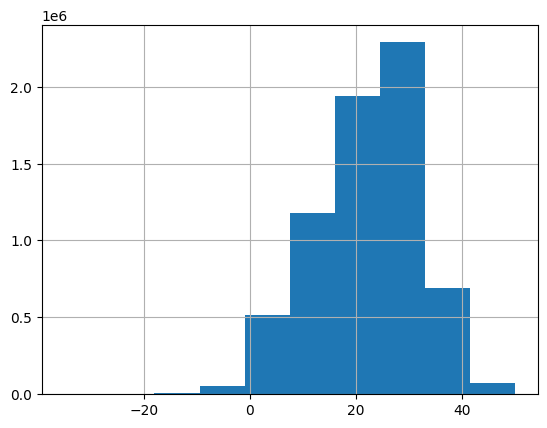

In [65]:
mdf['tmax'].hist()

Bar charts are useful for catergorical dtypes. Use code: mdf['categorical_column'].value_counts().plot(kind='bar')

<Axes: xlabel='FlightDate'>

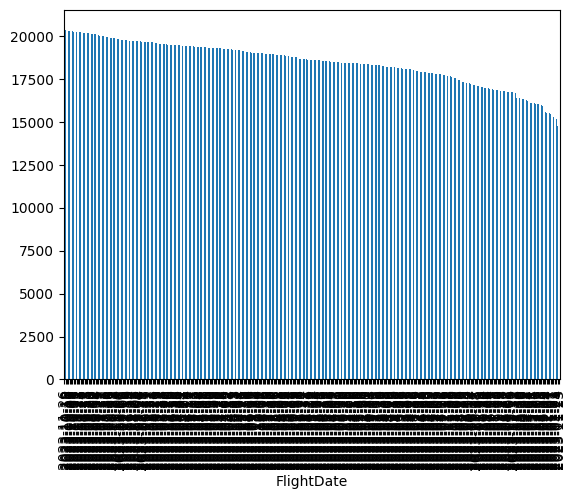

In [66]:
mdf['FlightDate'].value_counts().plot(kind='bar')

<Axes: xlabel='Dep_Delay_Type'>

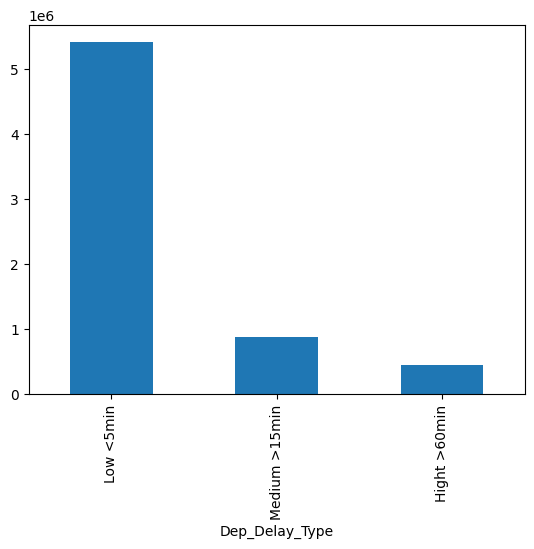

In [67]:
mdf['Dep_Delay_Type'].value_counts().plot(kind='bar')

## Bivariate analysis

### Scatter plot for numerical features
plt.scatter(df['feature1'], df['feature2'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature 1 vs Feature 2')
plt.show()

### Box plot for categorical and numerical features
sns.boxplot(x='categorical_feature', y='numerical_feature', data=df)

## Correlation analysis

### Data preparation for correlation matrix

Use LabelEnconder() for the relevant dtype = object columns

In [75]:
from sklearn.preprocessing import LabelEncoder

In [78]:
label_encoder = LabelEncoder()

* FlightDate             object - Not required as each date is unique and therefor not a category. May be interesting to consider months
* Airline                object
* Tail_Number            object
* Dep_Airport            object
* Dep_CityName           object
* DepTime_label          object
* Dep_Delay_Type         object
* Arr_Airport            object
* Arr_CityName           object
* Arr_Delay_Type         object
* Distance_type          object
* Manufacturer           object
* Model                  object

In [80]:
mdf['Airline'] = label_encoder.fit_transform(mdf['Airline'])
mdf['Tail_Number'] = label_encoder.fit_transform(mdf['Tail_Number'])
mdf['Dep_Airport'] = label_encoder.fit_transform(mdf['Dep_Airport'])
mdf['Dep_CityName'] = label_encoder.fit_transform(mdf['Dep_CityName'])
mdf['DepTime_label'] = label_encoder.fit_transform(mdf['DepTime_label'])
mdf['Dep_Delay_Type'] = label_encoder.fit_transform(mdf['Dep_Delay_Type'])
mdf['Arr_Airport'] = label_encoder.fit_transform(mdf['Arr_Airport'])
mdf['Arr_CityName'] = label_encoder.fit_transform(mdf['Arr_CityName'])
mdf['Arr_Delay_Type'] = label_encoder.fit_transform(mdf['Arr_Delay_Type'])
mdf['Distance_type'] = label_encoder.fit_transform(mdf['Distance_type'])
mdf['Manufacturer'] = label_encoder.fit_transform(mdf['Manufacturer'])
mdf['Model'] = label_encoder.fit_transform(mdf['Model'])

In [81]:
print("DataFrame with Label Encoded Values:")
print(mdf)

DataFrame with Label Encoded Values:
         FlightDate  Day_Of_Week  Airline  Tail_Number  Dep_Airport  \
0        2023-01-02            1        5         3041           28   
1        2023-01-03            2        5         3041           28   
2        2023-01-04            3        5         1532           28   
3        2023-01-05            4        5         5244           28   
4        2023-01-06            5        5         1586           28   
...             ...          ...      ...          ...          ...   
6743399  2023-12-31            7        8         5214          307   
6743400  2023-12-31            7        8         2728          204   
6743401  2023-12-31            7        8         1689          251   
6743402  2023-12-31            7        8         3873          246   
6743403  2023-12-31            7        8         2785           28   

         Dep_CityName  DepTime_label  Dep_Delay  Dep_Delay_Tag  \
0                 135              2        

In [83]:
mdf = mdf.drop(columns = ['FlightDate'])

In [84]:
mdf.head()

,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,Arr_Airport,...,Model,Aicraft_age,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
0,1,5,3041,28,135,2,-3,0,1,193,...,19,16,2.9,-2.1,8.3,0.0,0.0,338.0,3.2,1019.1
1,2,5,3041,28,135,2,-5,0,1,193,...,19,16,1.8,-1.6,4.4,10.7,0.0,3.0,3.6,1015.2
2,3,5,1532,28,135,2,-5,0,1,193,...,19,10,5.2,3.9,8.3,6.6,0.0,1.0,7.2,1011.1
3,4,5,5244,28,135,2,-6,0,1,193,...,19,17,6.8,3.9,7.8,0.8,0.0,14.0,13.7,1014.8
4,5,5,1586,28,135,2,-1,0,1,193,...,19,10,3.3,0.0,3.9,9.7,0.0,0.0,5.8,1016.1


### Corrrelation matrix calculation

In [85]:
corr_matrix = mdf.corr()

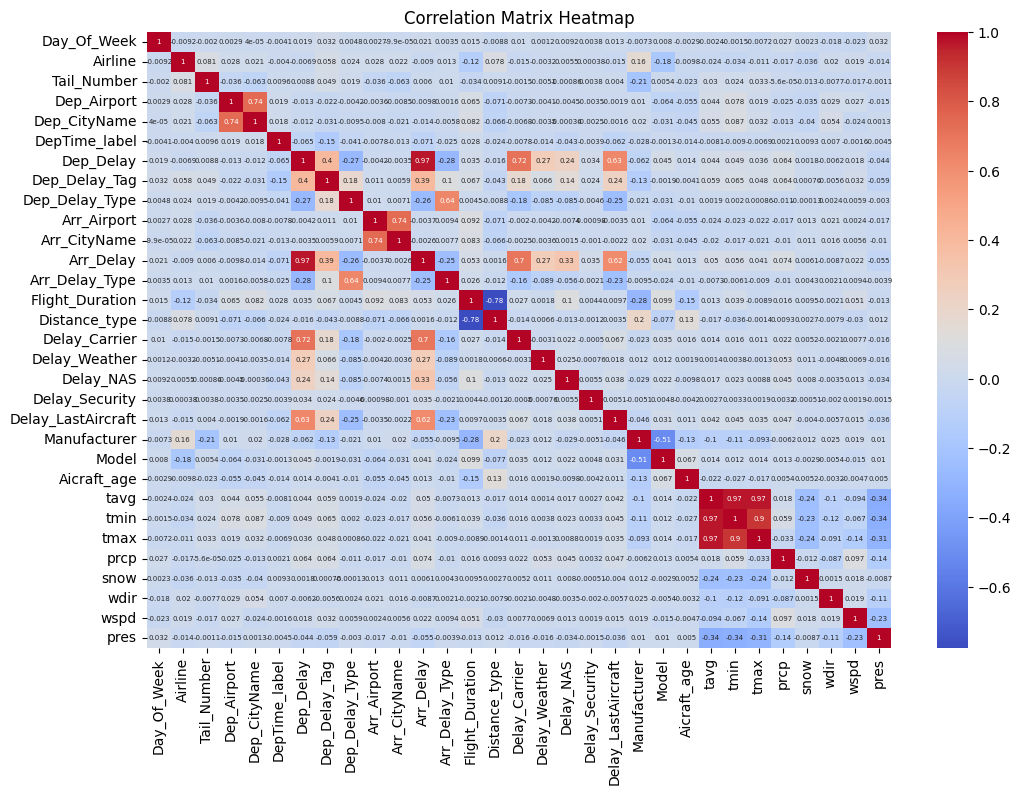

In [91]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 5})
plt.title("Correlation Matrix Heatmap")
plt.show()

# Dataset B

In [93]:
dfb = pd.read_csv('/Users/markmans/code/diego-mogollon/lateguru/raw_data/Dataset_B_FORWW_Kaggle_SFO.csv')

## Check dataset

In [94]:
dfb.head()

,Time,Origin,Dest,Carrier,Cancelled,CancellationReason,Delayed,DepDelayMinutes,CarrierDelay,WeatherDelay,...,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
0,2021-01-01 22:00:00,SFO,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,49.0,47.16,1023.71,1023.5,16093.40,4.60,30.38,0.0,0.0
1,2021-01-03 22:00:00,SFO,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,51.0,51.10,1022.01,1021.8,9656.04,4.60,30.38,0.0,0.0
2,2021-01-04 21:00:00,SFO,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,51.0,51.10,1023.71,1023.8,16093.40,6.90,30.38,0.0,0.0
3,2021-01-05 22:00:00,SFO,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,49.0,47.16,1023.71,1023.7,16093.40,4.60,30.38,0.0,0.0
4,2021-01-06 22:00:00,SFO,JFK,American Airlines Inc.,False,NaN,False,0.0,NaN,NaN,...,NaN,49.0,48.01,1024.72,1024.5,16093.40,3.45,30.38,0.0,0.0


In [95]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398942 entries, 0 to 398941
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    398942 non-null  object 
 1   Origin                  398942 non-null  object 
 2   Dest                    398942 non-null  object 
 3   Carrier                 398942 non-null  object 
 4   Cancelled               398942 non-null  bool   
 5   CancellationReason      5304 non-null    object 
 6   Delayed                 398942 non-null  bool   
 7   DepDelayMinutes         393795 non-null  float64
 8   CarrierDelay            67858 non-null   float64
 9   WeatherDelay            67858 non-null   float64
 10  NASDelay                67858 non-null   float64
 11  SecurityDelay           67858 non-null   float64
 12  LateAircraftDelay       67858 non-null   float64
 13  Temperature             398942 non-null  float64
 14  Feels_Like_Temperatu

In [96]:
dfb.describe()

,DepDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Temperature,Feels_Like_Temperature,Altimeter_Pressure,Sea_Level_Pressure,Visibility,Wind_Speed,Wind_Gust,Precipitation,Ice_Accretion_3hr
count,393795.000000,67858.000000,67858.000000,67858.000000,67858.000000,67858.000000,398942.000000,398942.000000,398942.000000,398942.000000,398942.000000,398942.000000,398942.000000,398942.000000,398942.0
mean,12.834569,26.825400,2.108550,9.454022,0.052757,26.344248,59.425419,59.200286,1016.629461,1016.654582,15221.800013,10.892898,30.358620,0.070532,0.0
std,47.223505,73.159454,26.785654,23.649364,2.551563,61.277070,7.331436,7.733875,5.004995,4.724856,2760.457598,7.382208,2.773577,0.497692,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,31.750000,985.440000,985.300000,96.560000,0.000000,16.110000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,54.000000,1013.210000,1013.700000,16093.400000,4.600000,30.380000,0.000000,0.0
50%,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,59.000000,59.000000,1016.260000,1016.600000,16093.400000,10.360000,30.380000,0.000000,0.0
75%,6.000000,26.000000,0.000000,11.000000,0.000000,31.000000,64.000000,64.000000,1019.640000,1019.300000,16093.400000,16.110000,30.380000,0.000000,0.0
max,2681.000000,2036.000000,1103.000000,1049.000000,371.000000,2246.000000,98.000000,93.850000,1032.170000,1032.200000,16093.400000,281.940000,73.650000,18.540000,0.0


In [97]:
dfb.isnull().sum()

Time                           0
Origin                         0
Dest                           0
Carrier                        0
Cancelled                      0
CancellationReason        393638
Delayed                        0
DepDelayMinutes             5147
CarrierDelay              331084
WeatherDelay              331084
NASDelay                  331084
SecurityDelay             331084
LateAircraftDelay         331084
Temperature                    0
Feels_Like_Temperature         0
Altimeter_Pressure             0
Sea_Level_Pressure             0
Visibility                     0
Wind_Speed                     0
Wind_Gust                      0
Precipitation                  0
Ice_Accretion_3hr              0
dtype: int64

In [99]:
dfb.dtypes

Time                       object
Origin                     object
Dest                       object
Carrier                    object
Cancelled                    bool
CancellationReason         object
Delayed                      bool
DepDelayMinutes           float64
CarrierDelay              float64
WeatherDelay              float64
NASDelay                  float64
SecurityDelay             float64
LateAircraftDelay         float64
Temperature               float64
Feels_Like_Temperature    float64
Altimeter_Pressure        float64
Sea_Level_Pressure        float64
Visibility                float64
Wind_Speed                float64
Wind_Gust                 float64
Precipitation             float64
Ice_Accretion_3hr         float64
dtype: object

## Correlation Matrix

* Time                       object
* Origin                     object
* Dest                       object
* Carrier                    object
* Cancelled                    bool
* CancellationReason         object
* Delayed                      bool

In [100]:
dfb['Time'] = label_encoder.fit_transform(dfb['Time'])
dfb['Origin'] = label_encoder.fit_transform(dfb['Origin'])
dfb['Dest'] = label_encoder.fit_transform(dfb['Dest'])
dfb['Carrier'] = label_encoder.fit_transform(dfb['Carrier'])
dfb['CancellationReason'] = label_encoder.fit_transform(dfb['CancellationReason'])

In [101]:
dfb = dfb.drop(columns = ['Time'])

In [102]:
corr_matrix_b = dfb.corr()

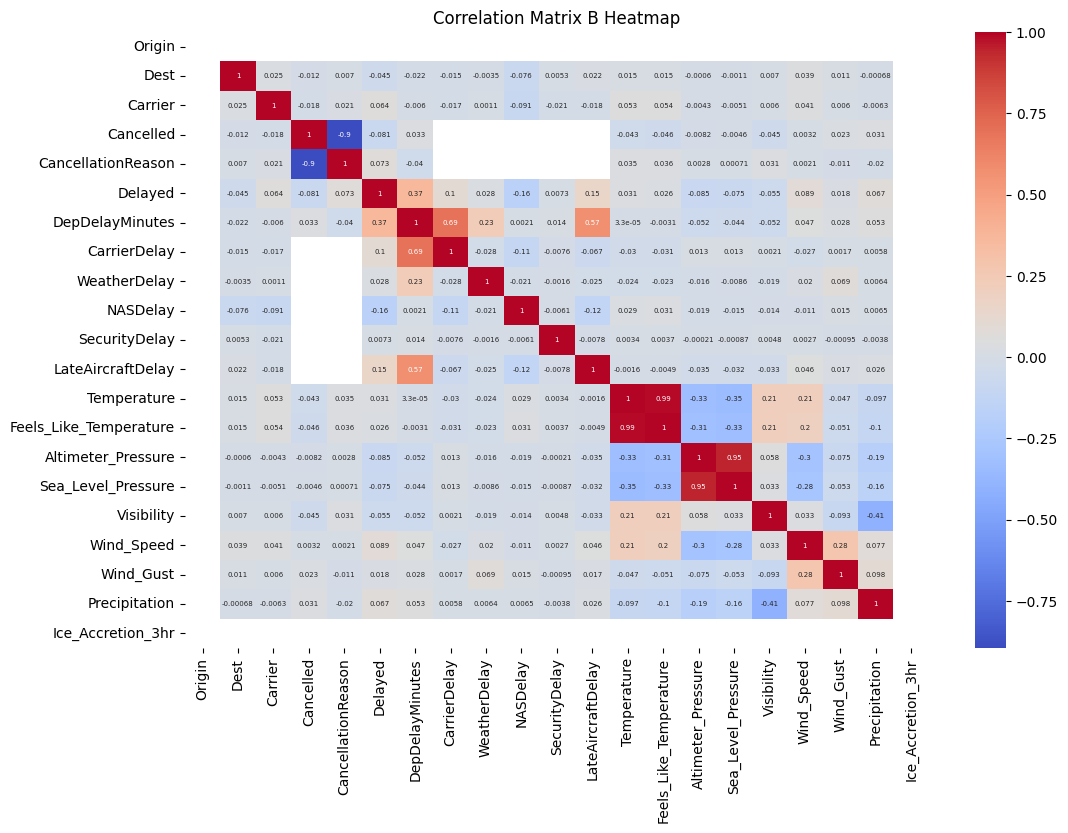

In [103]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_b, annot=True, cmap='coolwarm', annot_kws={"size": 5})
plt.title("Correlation Matrix B Heatmap")
plt.show()